In [1]:
#importing the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
exams_df = pd.read_csv('exams.csv')
exams_df

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Cleaning the Data

In [3]:
# Take a look at the first 5 datapoints
exams_df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Take a look at the last 5 datapoints
exams_df.tail()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
#check for the data type
exams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#To check for column list
exams_df.columns.to_list()

['gender',
 'race/ethnicity',
 'parent_education_level',
 'lunch',
 'test_prep_course',
 'math',
 'reading',
 'writing']

In [7]:
#To check for missing values
#No missing values
exams_df.isna().sum()

gender                    0
race/ethnicity            0
parent_education_level    0
lunch                     0
test_prep_course          0
math                      0
reading                   0
writing                   0
dtype: int64

## Data Analysis


### Question 1.
What are the average reading scores for students with/without the test preparation course?

In [8]:
# We can use groupby to group the information by the column "test_prep_course". 
#Then we select the column "reading" and use .mean() to get the average grade for each group:

avg_reading_scores = exams_df.groupby('test_prep_course')[['reading']].mean()
avg_reading_scores

,reading
test_prep_course,
completed,73.893855
none,66.534268


### Question 2.
What are the average scores for the different parental education levels?

In [9]:
#first of all find the Total score in over to find the average score
exams_df['total_score'] = exams_df['math'] + exams_df ['reading'] + exams_df['writing']
exams_df

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [10]:
avg_scores = exams_df.groupby('parent_education_level')[['total_score']].mean()
avg_scores

,total_score
parent_education_level,
associate's degree,208.707207
bachelor's degree,215.771186
high school,189.290816
master's degree,220.796610
some college,205.429204
some high school,195.324022


### Question 3.
Create plots to visualize findings for questions 1 and 2.

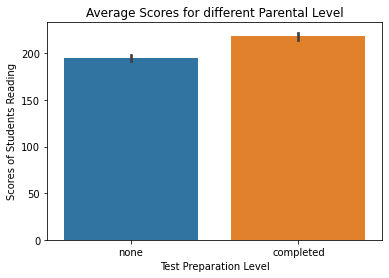

In [11]:
#Findings for question 1

#Add title
plt.title('Average Scores for different Parental Level')

p = sns.barplot(x=exams_df.test_prep_course, y=exams_df.total_score, data = avg_reading_scores,
                estimator=np.mean)
#set the y axis label
plt.xlabel('Test Preparation Level')
plt.ylabel('Scores of Students Reading')
p.set_xticklabels (p.get_xticklabels());

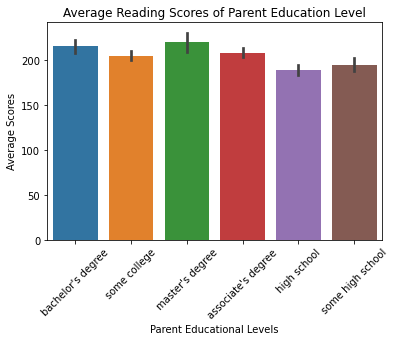

In [12]:
#Findings for question 2

#Add title
plt.title('Average Reading Scores of Parent Education Level')

p = sns.barplot(x=exams_df.parent_education_level, y=exams_df.total_score, data =avg_scores,
                estimator=np.mean)
#set the y axis label
plt.xlabel('Parent Educational Levels')
plt.ylabel('Average Scores')
p.set_xticklabels (p.get_xticklabels(), rotation = 45);


In [13]:
#We can also solve no 2 and 3 like this, if we want the results in segments

avg_scores2 = exams_df.groupby('parent_education_level')[['math', 'reading', 'writing']].mean()
avg_scores2 



,math,reading,writing
parent_education_level,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


Text(0, 0.5, 'Average Scores')

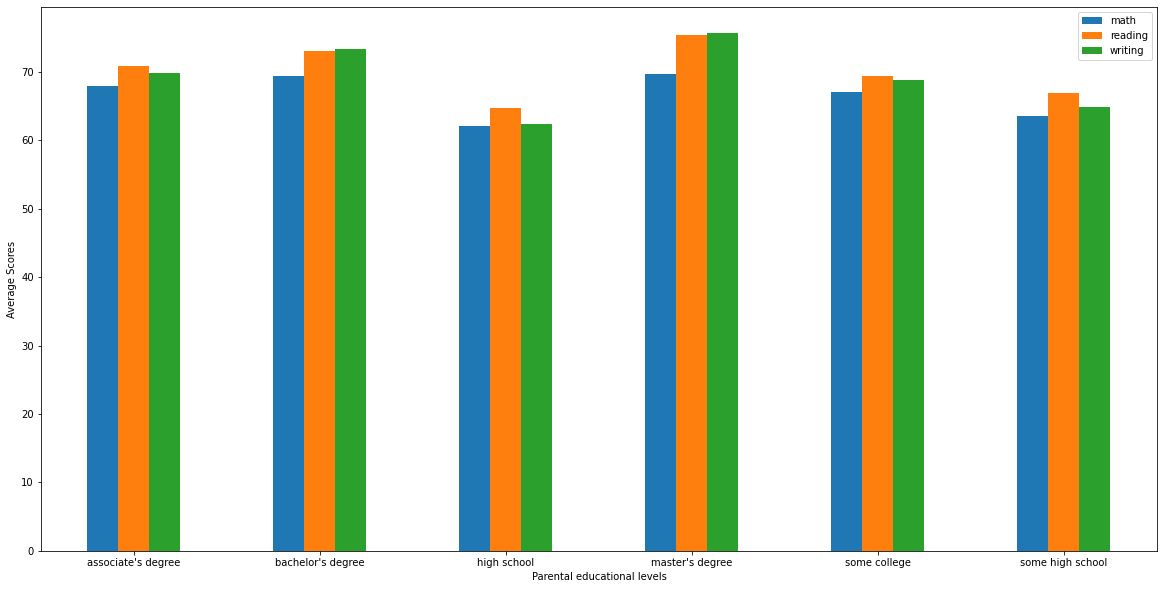

In [14]:
# The graph then looks like this

#Add title
#plt.title('Average Reading Scores of Parent Education Level')

ax= avg_scores2.plot(kind="bar",figsize=(20, 10),rot=0)

ax.set_xlabel("Parental educational levels")
ax.set_ylabel("Average Scores")


### Question 4.
[Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).

In [15]:
#Compare the average scores for students with/without the test preparation course for 
#different parental education levels (e.g., faceted plots).

avg_score_levels = exams_df.groupby(['test_prep_course', 'parent_education_level'])[['total_score']].mean().unstack()
avg_score_levels

total_score                                \
parent_education_level associate's degree bachelor's degree high school   
test_prep_course                                                          
completed                      224.817073        228.717391  200.892857   
none                           199.271429        207.500000  184.650000   

                                                                      
parent_education_level master's degree some college some high school  
test_prep_course                                                      
completed                   228.950000   223.961039       208.012987  
none                        216.615385   195.852349       185.745098

Text(0, 0.5, 'Average Scores')

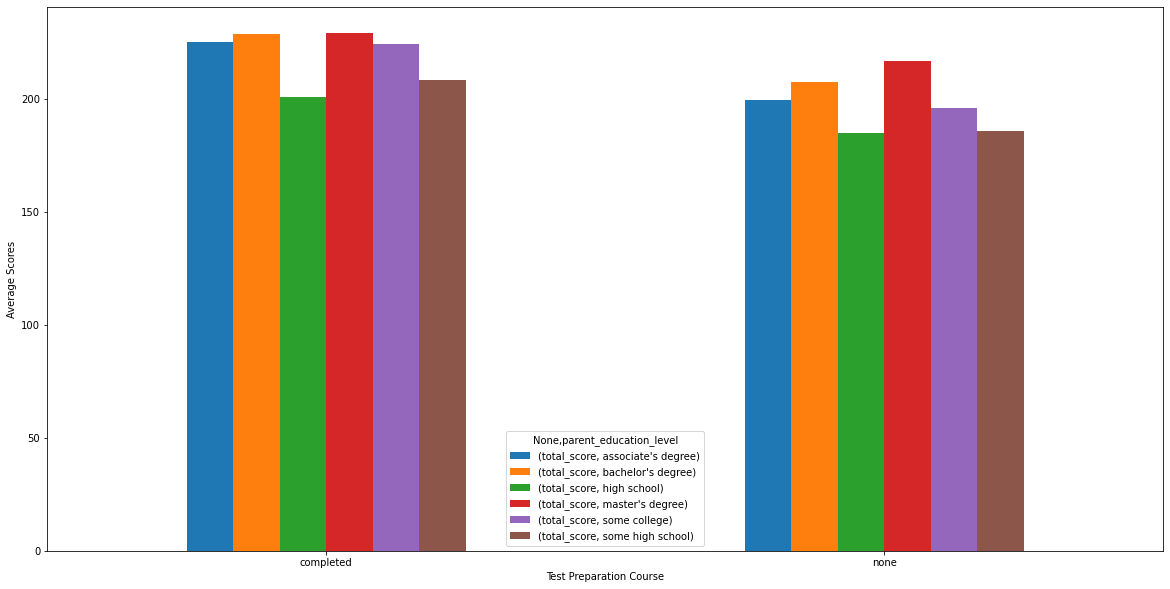

In [16]:
#How the graph looks
ax= avg_score_levels.plot(kind="bar",figsize=(20, 10),rot=0)

ax.set_xlabel("Test Preparation Course")
ax.set_ylabel("Average Scores")


In [17]:
#Lets look at the effect for gender
avg_score_gender= exams_df.groupby(['test_prep_course', 'parent_education_level', 'gender'])[['total_score']].mean().unstack()
avg_score_gender


total_score            
gender                                       female        male
test_prep_course parent_education_level                        
completed        associate's degree      231.500000  217.800000
                 bachelor's degree       234.681818  223.250000
                 high school             205.517241  195.925926
                 master's degree         233.928571  217.333333
                 some college            225.690476  221.885714
                 some high school        214.257143  202.809524
none             associate's degree      203.081081  195.000000
                 bachelor's degree       218.292683  193.225806
                 high school             189.215385  180.693333
                 master's degree         212.681818  221.705882
                 some college            206.000000  185.287671
                 some high school        185.714286  185.782609

In [18]:
#We had to transpose to get the best out of the graphical view
avg_transposed_gender= avg_score_gender.T # or df1.transpose()
avg_transposed_gender


test_prep_course                completed                                \
parent_education_level associate's degree bachelor's degree high school   
            gender                                                        
total_score female                  231.5        234.681818  205.517241   
            male                    217.8        223.250000  195.925926   

test_prep_course                                                      \
parent_education_level master's degree some college some high school   
            gender                                                     
total_score female          233.928571   225.690476       214.257143   
            male            217.333333   221.885714       202.809524   

test_prep_course                     none                                \
parent_education_level associate's degree bachelor's degree high school   
            gender                                                        
total_score female             203.081081        218.292683  189.215385   
            male               195.000000        193.225806  180.693333   

test_prep_course                                                      
parent_education_level master's degree some college some high school  
            gender                                                    
total_score female          212.681818   206.000000       185.714286  
            male            221.705882   185.287671       185.782609

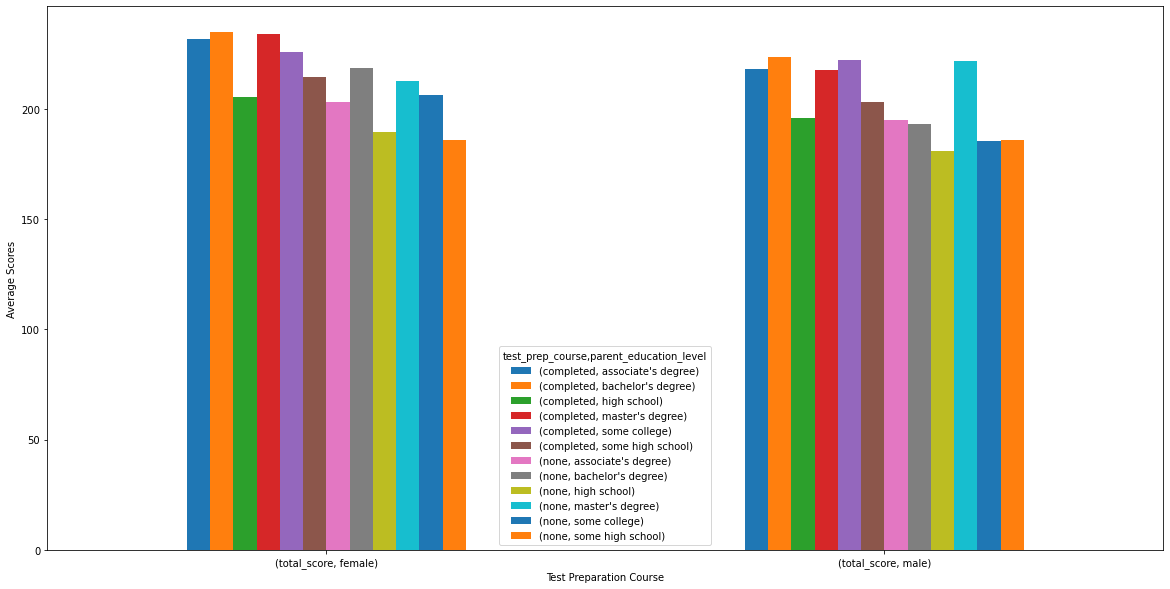

In [19]:
#The graphical representation for subgroup:gender
ax= avg_transposed_gender.plot(kind="bar", figsize=(20, 10),rot=0)

ax.set_xlabel("Test Preparation Course")
ax.set_ylabel("Average Scores")
p.set_xticklabels (p.get_xticklabels(), rotation = 45);

In [20]:
#Lets look at the effect for the subgroup: race/ethnicity
avg_score_race= exams_df.groupby(['test_prep_course', 'parent_education_level', 'race/ethnicity'])[['total_score']].mean().unstack()
avg_score_race


total_score                          \
race/ethnicity                              group A     group B     group C   
test_prep_course parent_education_level                                       
completed        associate's degree      211.400000  228.857143  220.433333   
                 bachelor's degree       214.750000  237.666667  230.100000   
                 high school             202.714286  198.066667  191.533333   
                 master's degree                NaN  221.333333  216.666667   
                 some college            220.857143  216.928571  229.666667   
                 some high school        204.375000  201.157895  198.409091   
none             associate's degree      180.666667  191.000000  200.437500   
                 bachelor's degree       198.000000  209.705882  209.350000   
                 high school             171.818182  178.333333  185.591837   
                 master's degree         190.000000  227.666667  198.500000   
                 some college            178.000000  178.652174  191.937500   
                 some high school        167.187500  184.578947  182.185185   

                                                                 
race/ethnicity                              group D     group E  
test_prep_course parent_education_level                          
completed        associate's degree      226.857143  230.789474  
                 bachelor's degree       215.333333  240.900000  
                 high school             202.636364  219.750000  
                 master's degree         231.666667  287.500000  
                 some college            225.391304  221.250000  
                 some high school        219.578947  224.777778  
none             associate's degree      200.666667  213.500000  
                 bachelor's degree       206.894737  209.125000  
                 high school             186.363636  202.285714  
                 master's degree         228.647059  220.500000  
                 some college            203.954545  214.260870  
                 some high school        197.419355  191.666667

In [21]:
#We had to transpose you get the right graphical view we wanted
avg_transposed_race= avg_score_race.T # or df1.transpose()
avg_transposed_race


test_prep_course                    completed                                \
parent_education_level     associate's degree bachelor's degree high school   
            race/ethnicity                                                    
total_score group A                211.400000        214.750000  202.714286   
            group B                228.857143        237.666667  198.066667   
            group C                220.433333        230.100000  191.533333   
            group D                226.857143        215.333333  202.636364   
            group E                230.789474        240.900000  219.750000   

test_prep_course                                                          \
parent_education_level     master's degree some college some high school   
            race/ethnicity                                                 
total_score group A                    NaN   220.857143       204.375000   
            group B             221.333333   216.928571       201.157895   
            group C             216.666667   229.666667       198.409091   
            group D             231.666667   225.391304       219.578947   
            group E             287.500000   221.250000       224.777778   

test_prep_course                         none                                \
parent_education_level     associate's degree bachelor's degree high school   
            race/ethnicity                                                    
total_score group A                180.666667        198.000000  171.818182   
            group B                191.000000        209.705882  178.333333   
            group C                200.437500        209.350000  185.591837   
            group D                200.666667        206.894737  186.363636   
            group E                213.500000        209.125000  202.285714   

test_prep_course                                                          
parent_education_level     master's degree some college some high school  
            race/ethnicity                                                
total_score group A             190.000000   178.000000       167.187500  
            group B             227.666667   178.652174       184.578947  
            group C             198.500000   191.937500       182.185185  
            group D             228.647059   203.954545       197.419355  
            group E             220.500000   214.260870       191.666667

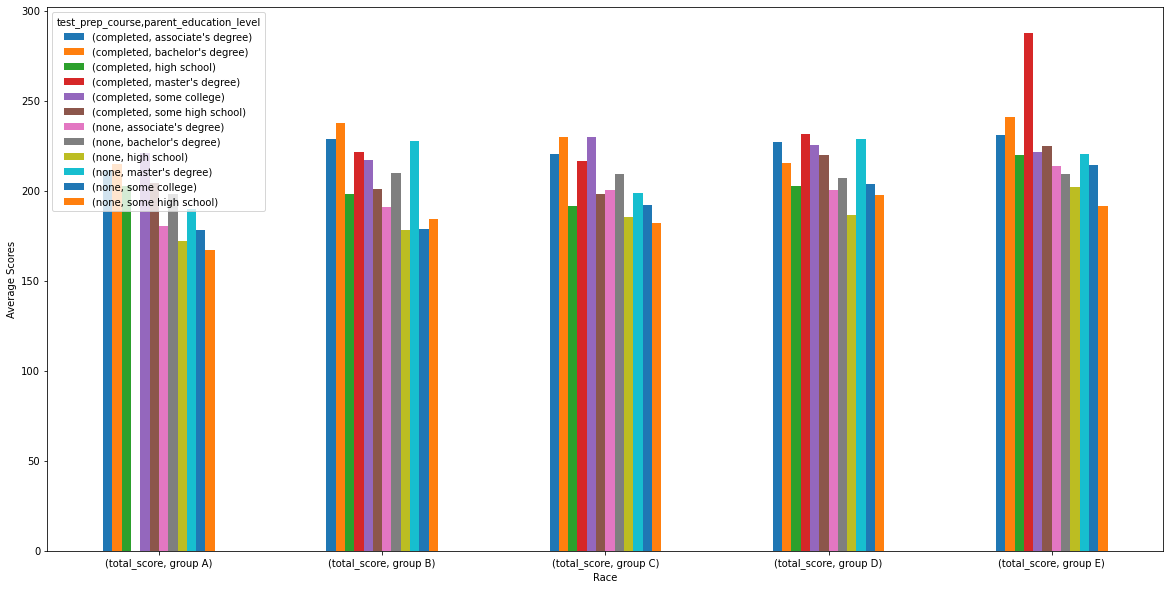

In [22]:
#The graphical representation for subgroup=race/ethnicity
ax= avg_transposed_race.plot(kind="bar", figsize=(20, 10),rot=0)

ax.set_xlabel("Race")
ax.set_ylabel("Average Scores")
p.set_xticklabels (p.get_xticklabels(), rotation = 45);

In [23]:
#Lets look at the effect for the subgroup: lunch
avg_score_lunch= exams_df.groupby(['test_prep_course', 'parent_education_level', 'lunch'])[['total_score']].mean().unstack()
avg_score_lunch

total_score            
lunch                                   free/reduced    standard
test_prep_course parent_education_level                         
completed        associate's degree       215.103448  230.132075
                 bachelor's degree        216.294118  236.000000
                 high school              191.000000  208.312500
                 master's degree          216.333333  247.875000
                 some college             199.076923  236.647059
                 some high school         189.434783  215.925926
none             associate's degree       184.916667  206.760870
                 bachelor's degree        191.629630  217.022222
                 high school              162.282609  195.595745
                 master's degree          186.333333  230.074074
                 some college             183.924528  202.437500
                 some high school         160.921053  200.484375

In [24]:
#We had to transpose you get the right graphical view we wanted
avg_transposed_lunch= avg_score_lunch.T # or df1.transpose()
avg_transposed_lunch


test_prep_course                  completed                                \
parent_education_level   associate's degree bachelor's degree high school   
            lunch                                                           
total_score free/reduced         215.103448        216.294118    191.0000   
            standard             230.132075        236.000000    208.3125   

test_prep_course                                                        \
parent_education_level   master's degree some college some high school   
            lunch                                                        
total_score free/reduced      216.333333   199.076923       189.434783   
            standard          247.875000   236.647059       215.925926   

test_prep_course                       none                                \
parent_education_level   associate's degree bachelor's degree high school   
            lunch                                                           
total_score free/reduced         184.916667        191.629630  162.282609   
            standard             206.760870        217.022222  195.595745   

test_prep_course                                                        
parent_education_level   master's degree some college some high school  
            lunch                                                       
total_score free/reduced      186.333333   183.924528       160.921053  
            standard          230.074074   202.437500       200.484375

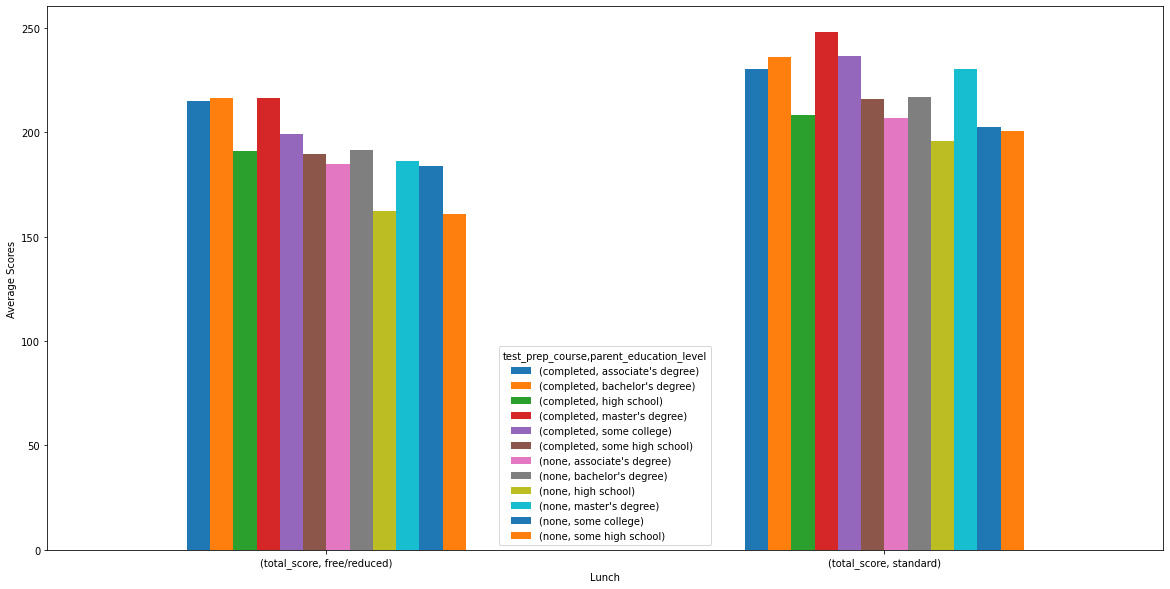

In [25]:
#The graphical representation for subgroup=lunch
ax= avg_transposed_lunch.plot(kind="bar", figsize=(20, 10),rot=0)

ax.set_xlabel("Lunch")
ax.set_ylabel("Average Scores")
p.set_xticklabels (p.get_xticklabels(), rotation = 45);

### Question 5
[Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.

In [28]:
#We want to  check the correlation between scores
sub_corr_scores = exams_df[['math','reading', 'writing']].corr()
sub_corr_scores
#ax = sns.regplot(x = 'math', y = 'reading', z='writing', data = exams_df)

,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


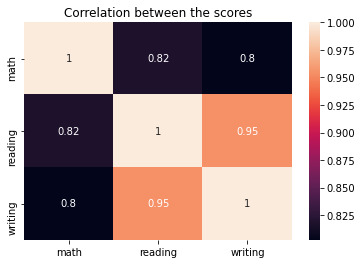

In [30]:
plt.title('Correlation between the scores')
sns.heatmap(sub_corr_scores, annot=True)

#### Summary of our findings.
From our dataset we can see that:

- The students who completed the test preparation course for reading is more than those who have not completed it. The average scores of the students who have completed the test preparation course is 73.89 and those who have not completed it is 66.53.
- Students whose parents had a masters degree had the highest average score, while students whose parents had a when to only high score had the lowest avarage score.
- For students whose parents had a masters degree their highest score was in writing, followed by reading.
- Students whose parents had associate degree, high school, some college had high scores in reading, while students whose parents had bachelors and masters degree had high scores in writing.
- Generally, all the students had low scores in math. Though, we noticed students whose parents had a high school degree had same scores in maths and writing.
- The trend of the different segments of the parents education level are the same for those with or without test preparation.i.e students whose parents had a masters degree had the highest score for those with or without test preparation and also for the other degrees.
- Between the male and female students whose parents had a masters degree with test preparation, the female students had the highest score. But without test preparation , the male students had the highest score.
- The race with the highest exam score whose parents had a masters degree with test preparation is Group E. But without test prepartion is Group B. I noticed Group A doesn't have students whose parents had a masters with test preparation.
- Students who received standard lunch are more than those who recieve free/reduced lunch for students whose parents had a masters with/without test preparation. We could see that their lunch had an effect on their grades.
- Their Maths, Writing and Reading  Scores are all positively and highly correlated and they all vary in the same direction.
- Also the data set was already cleaned so we didn't have missing values or duplicates.



##### Note for me
It's really helpful in filtering out unnecessary columns. Lower the correlation, lower is the attribute's importance.
-> If the value is +1 or close to it then we say the variables are positively correlated. And they vary in the same direction simultaneously.
-> If the value is -1 or close to it then we say the variables are negatively correlated. And they vary in the opposite direction simultaneously.
-> If the value is 0 or close to it then we say the variables are not correlated.